Tamaño de paso 'h': 0.05

   i    |  t[i]   |           y[i]            |           y[i+1]          |       SOL. Exacta         |      ERROR REL. RK4       | ERROR ABS. RK4 
-------------------------------------------------------------------------------------------------------------------------------------------------
   0    |   0.0   |           1.0             |           1.1            |    1.0986684015196073     |  0.0012120112661390728    | 0.0013315984803927705
   1    |  0.05   |           1.1             |          1.1975          |    1.1943489687432052     |  0.0026382835664107577    | 0.003151031256794834
   2    |   0.1   |          1.1975           |        1.29200625        |    1.2865758749086227     |   0.004220796610042934    | 0.005430375091377337
   3    |  0.15   |        1.29200625         |    1.3830462187500001    |    1.374911415336224      |   0.005916601842880716    | 0.008134803413776037
   4    |   0.2   |    1.3830462187500001     |    1.470173372109375   

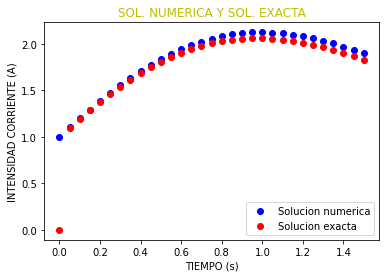

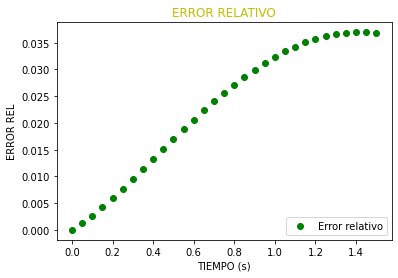

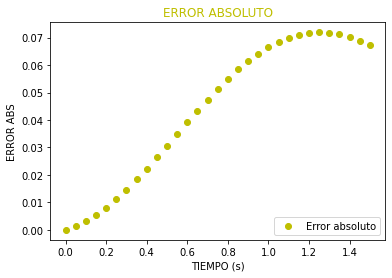

El tiempo de ejecucion en segundos fue: 0.4976541996002197


In [ ]:
"METODO EULER EDO2 (ORDEN 2)"

import numpy as np
import matplotlib.pyplot as plt
import math
from time import time
from scipy import special

def solucionexacta(t,y):     
      ec = (math.e**(-0.5*(t**2)))*((1.4142135*1.7724531*(erfi(t/1.4142)))+1) # solucion exacta encontrado en https://es.symbolab.com/solver/ o https://www.wolframalpha.com/input/
      return ec                                                                                                                                                                                           
def derivada2(t,y,u):
      ec = -t*u-y
      return ec   

h = float(input("Tamaño de paso 'h': "))        #Tamaño de paso
print('')
tiempo_inicial = time()                       # inicio conteo de tiempo
s = 1.5                                     # Tiempo final - Tiempo inicial  
n = int((s/h)+1)                               
t = np.zeros(n)                               # Matrices de ceros
x = np.zeros(n)
y = np.zeros(n)
yy = np.zeros(n)
u = np.zeros(n)
w = np.zeros(n)
z4 = np.zeros(n)
z44 = np.zeros(n)
t[0]=0                                        # Valores iniciales
y[0]=1
u[0]=2
w[0]=0
print('{:^7} | {:^7} | {:^24}  |  {:^24} | {:^24}  | {:^24}  | {:^15}'.format('i','t[i]','y[i]','y[i+1]','SOL. Exacta', 'ERROR REL. RK4', 'ERROR ABS. RK4'))
print("-------------------------------------------------------------------------------------------------------------------------------------------------")
for i in np.arange(1,n):
    
    yy[i-1]=y[i-1]                                                                     # Codigo e iteraciones RK4, EDO 2do orden .     
    y[i]=y[i-1] + (h)*u[i-1]
    u[i]=u[i-1] + h*derivada2(t[i-1],yy[i-1],u[i-1])
    t[i]=round(t[i-1] + h,3)
    w[i]=solucionexacta(t[i],y[i])
    z4[i]=abs((w[i]-y[i])/w[i])                             #ERROR RELATIVO RK4
    z44[i]=abs(w[i]-y[i])                                   #ERROR ABSOLUTO RK4

    print('{:^7} | {:^7} | {:^24}  | {:^24} | {:^24}  | {:^24}  | {:^15}'.format(i-1,t[i-1],y[i-1],y[i],w[i],z4[i],z44[i]))
   
plt.scatter(t,y,color='blue',label="Solucion numerica")
plt.scatter(t,w,color='red',label="Solucion exacta")
plt.title('SOL. NUMERICA Y SOL. EXACTA' , color = 'y')
plt.xlabel('TIEMPO (s)')
plt.ylabel('INTENSIDAD CORRIENTE (A)')
plt.legend()
plt.show()

plt.scatter(t,z4,color='green',label="Error relativo")
plt.title('ERROR RELATIVO' , color = 'y')
plt.xlabel('TIEMPO (s)')
plt.ylabel('ERROR REL')
plt.legend(loc=4)
plt.show()

plt.scatter(t,z44,color='y',label="Error absoluto")
plt.title('ERROR ABSOLUTO' , color = 'y')
plt.xlabel('TIEMPO (s)')
plt.ylabel('ERROR ABS')
plt.legend(loc=4)
plt.show()

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print ('El tiempo de ejecucion en segundos fue:',tiempo_ejecucion) # fin conteo de tiempo